In [1]:
import tensorflow as tf
print(tf.__version__)
import keras

2.11.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

Load the Data

In [3]:
from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv("CT Dataset Changed.csv")
da=pd.read_csv("CT Dataset For Model Error Prediction.csv",sep=",")
dataset = pd_dat.values

In [4]:
da

,Speciations,Burden,class,VoltageFactor,BDVOil,PrimarytoSecondary,PrimarytoEarth,SecondarytoEarth,Ratio100Error120,Ratio100Error100,Ratio100Error80,Phase100Error120,Phase100Error100,Phase100Error80
0,33,50,0.2,1.2/1.5,30,2000,900,900,-0.0839,-0.0594,-0.0524,-0.110,-0.690,-0.860
1,33,50,0.2,1.2/1.5,30,2000,700,800,-0.0256,-0.0120,-0.0070,-0.100,-0.430,-0.530
2,33,50,0.2,1.2/1.5,30,2000,750,750,-0.0450,-0.0595,-0.0661,-0.160,0.530,0.270
3,33,50,0.2,1.2/1.5,30,2000,950,980,-0.1530,-0.1460,-0.1440,-0.470,-0.570,-0.580
4,33,50,0.2,1.2/1.5,40,2000,800,750,-0.0385,-0.0327,-0.0315,-0.326,-0.022,-0.022
5,33,50,0.2,1.2/1.5,30,2000,750,900,-0.0588,-0.0452,-0.0380,0.100,-0.270,-0.470
6,33,50,0.2,1.2/1.5,30,2000,700,800,-0.0535,-0.0450,-0.0415,-0.290,-0.500,-0.560
7,33,50,0.2,1.2/1.5,30,2000,900,800,-0.0500,-0.0403,-0.0366,0.080,-0.230,-0.330
8,33,50,0.2,1.2/1.5,33,2000,800,700,-0.0441,-0.0364,-0.0341,0.510,0.200,0.140
9,33,50,0.2,1.2/1.5,33,1000,700,550,-0.0506,-0.0460,-0.0424,0.660,0.470,0.360


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:7],dataset[:,7:], test_size=0.33)
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
# .astype(np.float32)

In [6]:
spec_train, Burden_train, class_train, BDV_train, PtoS_train, PtoE_train, StoR_train = np.transpose(X_train)
spec_test, Burden_test, class_test, BDV_test, PtoS_test, PtoE_test, StoR_test = np.transpose(X_test)

Ratio100Error120_train, Ratio100Error100_train ,Ratio100Error80_train, Phase100Error120_train ,Phase100Error100_train, Phase100Error80_train, Ratio25Error120_train, Ratio25Error100_train, Ratio25Error80_train, Phase25Error120_train, Phase25Error100_train, Phase25Error80_train = Y_train[:,0], Y_train[:,1], Y_train[:,2], Y_train[:,3],Y_train[:,4],Y_train[:,5],Y_train[:,6],Y_train[:,7],Y_train[:,8],Y_train[:,9],Y_train[:,10], Y_train[:,11]
Ratio100Error120_test, Ratio100Error100_test ,Ratio100Error80_test, Phase100Error120_test ,Phase100Error100_test, Phase100Error80_test, Ratio25Error120_test, Ratio25Error100_test, Ratio25Error80_test, Phase25Error120_test, Phase25Error100_test, Phase25Error80_test = Y_test[:,0], Y_test[:,1], Y_test[:,2], Y_test[:,3],Y_test[:,4],Y_test[:,5],Y_test[:,6],Y_test[:,7],Y_test[:,8],Y_test[:,9],Y_test[:,10], Y_test[:,11]

Build the Model

In [7]:
from tensorflow.keras import Input, layers
shape_inputs = (1,)
spec = Input(shape=shape_inputs, name='spec')
Burden= Input(shape=shape_inputs, name='Burden')
Class= Input(shape=shape_inputs, name='Class')
BDVOil= Input(shape=shape_inputs, name='BDVOil')
PtoS= Input(shape=shape_inputs, name='PtoS')
PtoE= Input(shape=shape_inputs, name='PtoE')
StoR= Input(shape=shape_inputs, name='StoR')


In [8]:
list_inputs = [spec,  Burden, Class,  BDVOil, PtoS, PtoE, StoR]

In [9]:
X= layers.concatenate(list_inputs)

In [10]:
Ratio100Error120 = layers.Dense(1,activation='sigmoid', name= 'R100E120')(X)
Ratio100Error100 = layers.Dense(1,activation='sigmoid', name= 'R100E100')(X) 
Ratio100Error80 = layers.Dense(1,activation='sigmoid', name= 'R100E80')(X)
Phase100Error120 = layers.Dense(1,activation='sigmoid', name= 'P100E120')(X) 
Phase100Error100 = layers.Dense(1,activation='sigmoid', name= 'P100E100')(X)
Phase100Error80 = layers.Dense(1,activation='sigmoid', name= 'P100E80')(X)
Ratio25Error120 = layers.Dense(1,activation='sigmoid', name= 'R25E120')(X)
Ratio25Error100 = layers.Dense(1,activation='sigmoid', name= 'R25E100')(X)
Ratio25Error80 = layers.Dense(1,activation='sigmoid', name= 'R25E80')(X)
Phase25Error120 = layers.Dense(1,activation='sigmoid', name= 'P25E120')(X)
Phase25Error100 = layers.Dense(1,activation='sigmoid', name= 'P25E100')(X)
Phase25Error80 = layers.Dense(1,activation='sigmoid', name= 'P25E80')(X)

In [11]:
list_outputs = [Ratio100Error120, Ratio100Error100, Ratio100Error80, Phase100Error120, Phase100Error100, Phase100Error80, Ratio25Error120, Ratio25Error100, Ratio25Error80, Phase25Error120, Phase25Error100, Phase25Error80]   
reg1 = linear_model.LinearRegression()
reg1.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Ratio100Error120)
reg2 = linear_model.LinearRegression()
reg2.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Ratio100Error100)
reg3 = linear_model.LinearRegression()
reg3.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Ratio100Error80)
reg4 = linear_model.LinearRegression()
reg4.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Phase100Error120)
reg5 = linear_model.LinearRegression()
reg5.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Phase100Error100)
reg6 = linear_model.LinearRegression()
reg6.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Phase100Error80)
reg1.coef_
reg2.coef_
reg3.coef_
reg4.coef_
reg5.coef_
reg6.coef_
reg1.intercept_
reg2.intercept_
reg3.intercept_
reg4.intercept_
reg5.intercept_
reg6.intercept_

1.653491737221143

In [12]:
model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

Plot the Model

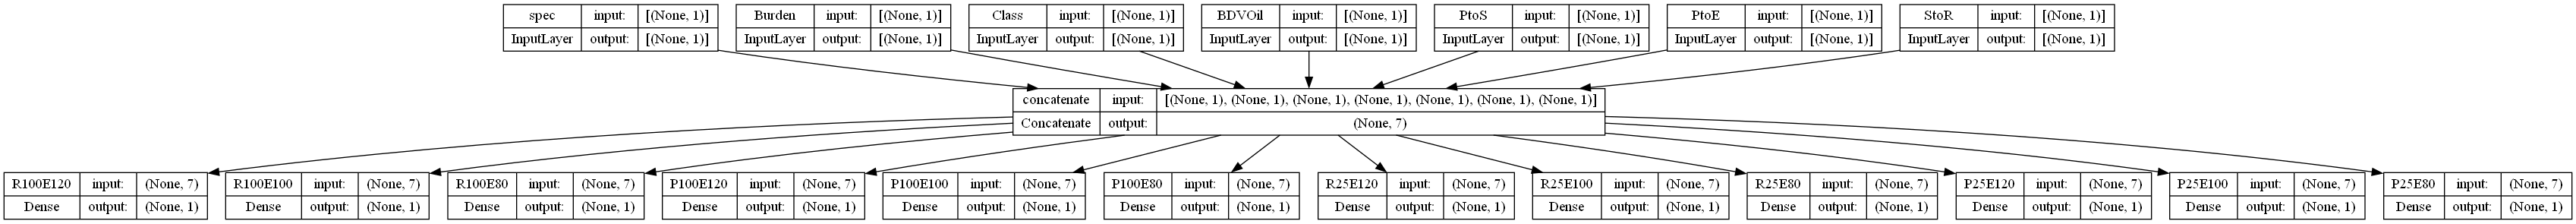

In [13]:
tf.keras.utils.plot_model(model, 'muti_input_output_model.png', show_shapes=True)

Compile The Model

In [14]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss={'Ratio100Error120':'binary_crossentropy', 
#                                                                 'Ratio100Error100':'binary_crossentropy',
#                                                                 'Ratio100Error80':'binary_crossentropy', 
#                                                                 'Phase100Error120':'binary_crossentropy', 
#                                                                 'Phase100Error100':'binary_crossentropy', 
#                                                                 'Phase100Error80':'binary_crossentropy',
#                                                                 'Ratio25Error120':'binary_crossentropy', 
#                                                                 'Ratio25Error100':'binary_crossentropy',
#                                                                 'Ratio25Error80':'binary_crossentropy',
#                                                                 'Phase25Error120':'binary_crossentropy',
#                                                                 'Phase25Error100':'binary_crossentropy', 
#                                                                 'Phase25Error80':'binary_crossentropy'},
#                                                                 metrics=['acc'],
#                                                                 loss_weights=[1.,0.2])

In [15]:
from keras.backend import binary_crossentropy
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss=
                                                                ['binary_crossentropy', 
                                                                'binary_crossentropy',
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy',
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy',
                                                                'binary_crossentropy',
                                                                'binary_crossentropy',
                                                                'binary_crossentropy', 
                                                                 'binary_crossentropy'
                                                                 ]
                                                                ,
                                                                metrics={'R100E120':['acc'],
                                                                         'R100E100':['acc'],
                                                                         'R100E80':['acc'],
                                                                         'P100E120':['acc'],
                                                                         'P100E100':['acc'],
                                                                         'P100E80':['acc'],
                                                                         'R25E120':['acc'],
                                                                         'R25E100':['acc'],
                                                                         'R25E80':['acc'],
                                                                         'P25E120':['acc'],
                                                                         'P25E100':['acc'],
                                                                         'P25E80':['acc']
                                                                         },
                                                                loss_weights=[1.,0.2])


In [16]:
# model.compile(
#     loss = {
#         "output_2" : keras.losses.BinaryCrossentropy(from_logits=False),
#         "output_1" : keras.losses.CategoricalCrossentropy(from_logits=False)
#     },
#     metrics = ['accuracy'],
#     optimizer = keras.optimizers.Adam()
# )

Fit Model

In [17]:
# inputs_train={'spec' :spec_train, 
#               'PTRatio': PTRatio_train, 
#               'Type1':Type1_train, 
#               'Type2':Type2_train, 
#               'Burden':Burden_train, 
#               'Class': class_train, 
#               'VoltF':VF_train, 
#               'BDVOil': BDV_train, 
#               'PtoS':PtoS_train, 
#               'PtoE': PtoE_train, 
#               'StoR':StoR_train}

# outputs_train={'Ratio100Error120': Ratio100Error120_train,
#                 'Ratio100Error100':Ratio100Error100_train,
#                 'Ratio100Error80':Ratio100Error80_train ,
#                 'Phase100Error120':Phase100Error120_train,
#                 'Phase100Error100':Phase100Error100_train,
#                 'Phase100Error80':Phase100Error80_train,
#                 'Ratio25Error120':Ratio25Error120_train,
#                 'Ratio25Error100':Ratio25Error100_train,
#                 'Ratio25Error80':Ratio25Error80_train,
#                 'Phase25Error120':Phase25Error120_train,
#                 'Phase25Error100':Phase25Error100_train,
#                 'Phase25Error80':Phase25Error80_train

# }

In [18]:
inputs_train=[spec_train, 
              Burden_train, 
              class_train, 
               BDV_train, 
              PtoS_train, 
               PtoE_train, 
              StoR_train]

outputs_train=[Ratio100Error120_train,
                Ratio100Error100_train,
                Ratio100Error80_train 
                ,Phase100Error120_train,
                Phase100Error100_train,
                Phase100Error80_train,
                Ratio25Error120_train,
                Ratio25Error100_train,
                Ratio25Error80_train,
                Phase25Error120_train,
                Phase25Error100_train,
                Phase25Error80_train
]

In [19]:
history = model.fit(inputs_train, outputs_train,
                    epochs = 8,
                    batch_size=32,
                    #128
                    verbose=False)

Plot Learning Curves

In [20]:
reg1.predict([[33,50,0.2,44,1000,50,750]])

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06848368])

In [21]:
reg2.predict([[33,50,0.2,44,1000,50,750]])

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06125002])

In [22]:
reg3.predict([[33,50,0.2,44,1000,50,750]])

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.05693145])

In [23]:
reg4.predict([[33,50,0.2,44,1000,50,750]])

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.06251013])

In [24]:
reg5.predict([[33,50,0.2,44,1000,50,750]])

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.24514275])

In [25]:
reg6.predict([[33,50,0.2,44,1000,50,750]])

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.39755326])